In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix

In [2110]:
import os
import sys
import argparse
from os.path import dirname, realpath


In [2111]:
sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))

In [2112]:
%run load_Results.py

wt00 = np.where(gold0 == 1, 1/.064, 1)

# this is best so far,.default
wts01 = np.where(gold1 == 1, 1/.064, 1)
wts02 = np.where(gold2 == 1, 1/.064, 2)
wts03 = np.where(gold3 == 1, 1/.064, 3)
wts04 = np.where(gold4 == 1, 1/.064, 4)

#  .default
wts01 = np.where(gold1 == 1, 1/.02, 1)
wts02 = np.where(gold2 == 1, 2/.02, 2)
wts03 = np.where(gold3 == 1, 3/.02, 3)
wts04 = np.where(gold4 == 1, 4/.02, 4)

wts01 = np.where(gold1 == 1,1/(np.mean(gold1)), 1/(1-mp1) )
wts02 = np.where(gold2 == 1,1/(np.mean(gold2)), 2/((1-mp2)) )
wts03 = np.where(gold3 == 1,1/(np.mean(gold3)), 3/((1-mp3)) )
wts04 = np.where(gold4 == 1,1/(np.mean(gold4)), 4/((1-mp4)))
# this is best so far,.default


In [2593]:
wts01 = np.where(gold1 == 1, 1/(np.mean(gold0)* (1-mp1) **1), 1/ mp1**1)
wts02 = np.where(gold2 == 1, 1/(np.mean(gold0)* (1-mp2) **1), 2/ mp2**1)
wts03 = np.where(gold3 == 1, 1/(np.mean(gold0)* (1-mp3) **1), 3/ mp3**1)
wts04 = np.where(gold4 == 1, 1/(np.mean(gold0)* (1-mp4) **1), 4/ mp4**1)


In [2690]:
wts01 = np.where(gold1 == 1, 1/(np.mean(gold1)* np.mean(.064)* (1-mp1) **1), 1/ mp1**1)
wts02 = np.where(gold2 == 1, 1/(np.mean(gold2)* np.mean(.064)* (1-mp2) **1), 2/ mp2**1)
wts03 = np.where(gold3 == 1, 1/(np.mean(gold3)*np.mean(.064) *(1-mp3) **1), 3/ mp3**1)
wts04 = np.where(gold4 == 1, 1/(np.mean(gold4)*np.mean(.064)* (1-mp4) **1), 4/ mp4**1)

In [2691]:
wts1234 = np.concatenate((wts01,wts02, wts03, wts04))
y1234 = np.concatenate((gold1,gold2, gold3, gold4))
lo1234 = logit( np.concatenate((mp1,mp2, mp3, mp4)) )
tlo1234 = logit( np.concatenate((tp1,tp2, tp3, tp4)) )
ti = np.concatenate((np.ones(len(mp1)), 2*np.ones(len(mp2)), 3*np.ones(len(mp3)), 4*np.ones(len(mp4))))
tti = np.concatenate((np.ones(len(tp1)), 2*np.ones(len(tp2)), 3*np.ones(len(tp3)), 4*np.ones(len(tp4))))

In [2692]:
def weighted_temp2_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits ) *  t [0]   + t[1]
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

def temp_pred2 (alpha,  test_logit):    
    logi =  (test_logit )* alpha[0]    + alpha[1]
    proba = expit ( logi  ) #*tt.x[5]    
    return proba

In [2693]:
alpha_0_1234  = weighted_temp2_scaling(  lo1234 , y1234,  wts1234)


In [2694]:
pc = temp_pred2(alpha_0_1234, lo1234 )

(array([10732.,  7184.,  5281.,  4433.,  4130.,  4198.,  4321.,  4879.,
         5148.,  3974.]),
 array([0.00902889, 0.10657084, 0.2041128 , 0.30165475, 0.39919671,
        0.49673866, 0.59428062, 0.69182257, 0.78936453, 0.88690648,
        0.98444844]),
 <BarContainer object of 10 artists>)

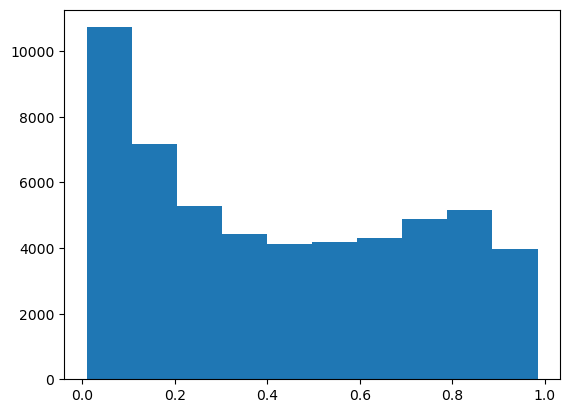

In [2695]:
plt.hist(pc)

In [2696]:
k =1
wp1 = ( pc [ti==1])**k
wp2 = ( pc [ti==2]) **k
wp3 = ( pc [ti==3]) **k
wp4 =  (pc [ti==4])**k
np1 =  ((1-pc) [ti==1])**k
np2 =  ((1-pc) [ti==2])**k
np3 =  ((1-pc) [ti==3])**k
np4 =  ((1-pc) [ti==4])**k

In [2713]:
wts1 = np.where(gold1 == 1, 1/( np1 *np.mean(gold1)), 1/ wp1)
wts2 = np.where(gold2 == 1, 1/( np2 *np.mean(gold2)), 2/ wp2)
wts3 = np.where(gold3 == 1, 1/( np3 *np.mean(gold3)), 3/wp3 )
wts4 = np.where(gold4 == 1, 1/( np4 *np.mean(gold4)), 4/wp4 )

In [2714]:
def temperature_multi_w(l1, l2,l3,l4, y1, y2, y3, y4, w1, w2, w3, w4):
    def temperature_obj(t):
        logi_1 = (l1* t[5]  +  t[1])  
        logi_2 = (l2 * t[6]  +  t[2])  
        logi_3 = (l3 * t[7] +  t[3])  
        logi_4 = (l4 * t[8] +  t[4])  
        
        p1  = expit (t[0] * logi_1  )  
        p2  = expit ( t[0] *  logi_2  )  
        p3  = expit (t[0] *  logi_3  )  
        p4  = expit ( t[0] * logi_4  ) 
        total_loss=log_loss(y1,p1,sample_weight=w1)+log_loss(y2,p2,sample_weight=w2)+log_loss(y3,p3,sample_weight=w3)+log_loss(y4,p4,sample_weight=w4)        
        return   total_loss
    r = minimize (temperature_obj, x0 = [.1, .1, .1,.1, 
                                         .1, .1,.1, .1, .1  ] )    
    return  r

In [2715]:
tt  = temperature_multi_w( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [2716]:
tt['message']

'Optimization terminated successfully.'

In [2717]:
def temp_pred  ( j1,j2, test_logit):    
    logi =  ( test_logit * j2    + j1    )  
    proba = expit (  logi * tt.x[0]  )  
    return proba

In [2718]:
cal_1 = temp_pred(tt.x[1],tt.x[5], logit(tp1) )
cal_2 = temp_pred(tt.x[2],tt.x[6], logit(tp2) )
cal_3 = temp_pred(tt.x[3],tt.x[7], logit(tp3) )
cal_4 = temp_pred(tt.x[4],tt.x[8], logit(tp4) )

y1, p1 = calibration_curve(M_test1['golds'], cal_1 , n_bins = 300)
y2, p2 = calibration_curve(M_test2['golds'], cal_2 , n_bins = 300)
y3, p3 =calibration_curve(M_test3['golds'], cal_3 , n_bins = 250)
y4, p4 = calibration_curve(M_test4['golds'], cal_4 , n_bins = 250)

In [2719]:
p4_ = p4 [y4>0]
y4_ = y4 [y4>0]
p3_ = p3 [y3>0]
y3_ = y3 [y3>0]
p2_ = p2 [y2>0]
y2_ = y2 [y2>0]
p1_ = p1 [y1>0]
y1_ = y1 [y1>0]

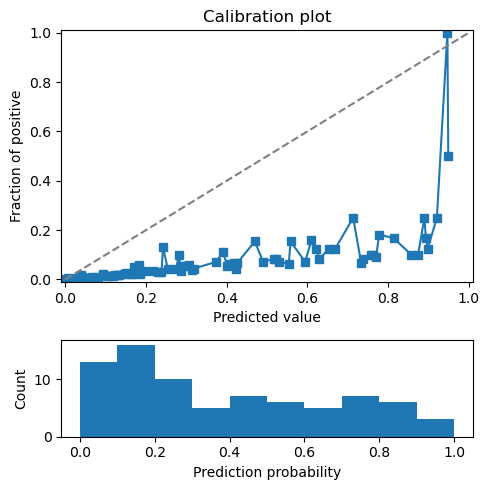

In [2720]:
plotter(p4_, y4_)

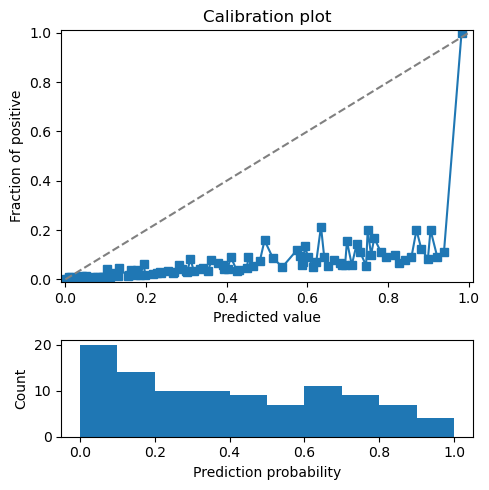

In [2721]:
plotter(p3_, y3_)

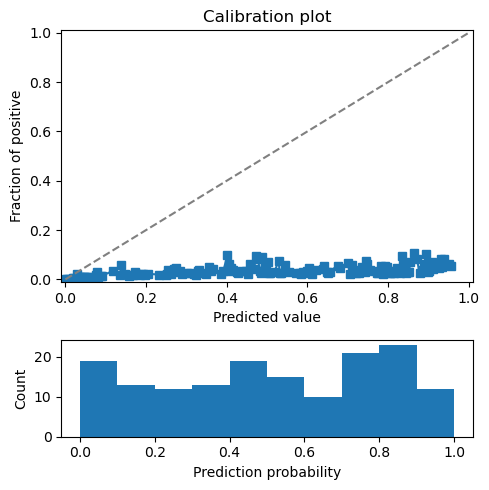

In [2722]:
plotter(p2_, y2_)

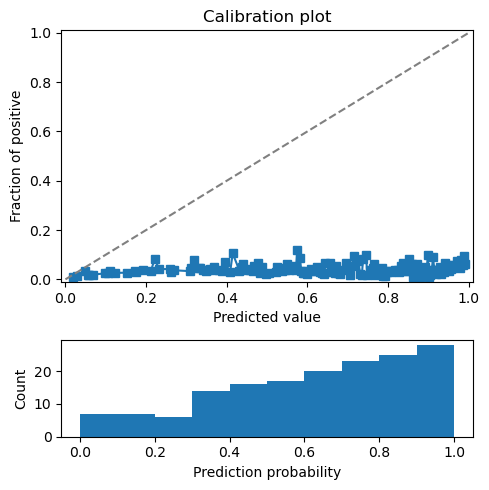

In [2723]:
plotter(p1_, y1_)

In [2724]:
[sklearn.metrics.roc_auc_score(tgold4,  tp4 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold3,  tp3 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold2,  tp2 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold1,  tp1 , average = 'samples')]


[0.754709382855384, 0.7132108023602834, 0.6764938403022082, 0.6667921165559247]

In [2725]:
( confusion_matrix (tgold1,  cal_1>.5) )

array([[ 5281, 10371],
       [   59,   421]], dtype=int64)

In [2726]:
( confusion_matrix (tgold2,  cal_2>.5) )

array([[9424, 4582],
       [ 104,  116]], dtype=int64)

In [2727]:
( confusion_matrix (tgold3,  cal_3>.5) )

array([[11200,  1476],
       [  102,    51]], dtype=int64)

In [2728]:
( confusion_matrix (tgold4,  cal_4>.5) )

array([[10605,   975],
       [   70,    31]], dtype=int64)

In [ ]:

src_path = "G:\\FillmoreCancerData\\markhe\\VTERisk" 

In [ ]:
    f.savefig(".png".format(filepath))
